In [57]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras import callbacks
from keras.utils import to_categorical
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import math
import pandas as pd
import gc
import imageio
from PIL import Image
import seaborn as sns
import cv2
import os

In [58]:
gc.collect()

59

In [51]:
# Verific daca totul este bine pentru a incepe sa lucrez cu datele de intrare

os.listdir('data')
# os.listdir('./data/train')
# os.listdir('./data/validation')
# os.listdir('./data/test')

['test', 'test.txt', 'train', 'train.txt', 'validation', 'validation.txt']

In [77]:
# Citesc din fisierele train.txt, validation.txt, test.txt

# atribui cele 9 clase diferite din datele cerintei
label = { 0:'class 0', 1:'class 1', 2:'class 2', 3:'class 3', 
          4:'class 4', 5:'class 5', 6:'class 6', 7:'class 7', 
          8:'class 8'}

# citesc datele Train

y_train = []
img_train = []

f = open("data/train.txt", "r")

for line in f:
    x = line.split(",")
    img_train.append( x[0] )
    y_train.append([ int( x[1][0] ) ])
    
y_train = np.array(y_train)

print(img_train[:4]) # primele 4 imagini din train

print()
print(y_train)  # etichetele corespunzatoare imaginilor
print('y_train type:', type(y_train))
print('y_train len:',  len(y_train))
print('y_train shape:', y_train.shape)

gc.collect()

['000000.png', '000001.png', '000002.png', '000003.png']

[[6]
 [0]
 [0]
 ...
 [0]
 [5]
 [0]]
y_train type: <class 'numpy.ndarray'>
y_train len: 30001
y_train shape: (30001, 1)


0

In [78]:
# citesc datele Validation

y_validation = []
img_validation = []

f = open("data/validation.txt", "r")

for line in f:
    x = line.split(",")
    img_validation.append(x[0])
    y_validation.append([ int( x[1][0] ) ])
    
y_validation = np.array(y_validation)

print(img_validation[:4]) # primele 4 imagini din Validation

print()
print(y_validation) # etichetele corespunzatoare imaginilor
print('y_validation type:', type(y_validation))
print('y_validation len:',  len(y_validation))
print('y_validation shape:', y_validation.shape)

gc.collect()

['030001.png', '030002.png', '030003.png', '030004.png']

[[8]
 [1]
 [4]
 ...
 [7]
 [4]
 [8]]
y_validation type: <class 'numpy.ndarray'>
y_validation len: 5000
y_validation shape: (5000, 1)


0

In [79]:
# citesc datele Test

y_test = []
img_test = []

f = open("data/test.txt", "r")

for line in f:
    x = line.split("\n")
    img_test.append(x[0])
    y_test.append( [ int( 0 ) ]) 
    
y_test = np.array(y_test)

print(img_test[:4]) # primele 4 imagini din Test

print()
print(y_test)  # etichetele corespunzatoare imaginilor, care sunt bineinteles necompletate acum
print('y_test type:', type(y_test))
print('y_test len:',  len(y_test))
print('y_test shape:', y_test.shape)

gc.collect()

['035001.png', '035002.png', '035003.png', '035004.png']

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
y_test type: <class 'numpy.ndarray'>
y_test len: 5000
y_test shape: (5000, 1)


0

In [80]:
# Am grija sa verific tot timpul daca am lucrat bine obtinand astfel tipul numpy array

print(type(y_train))
print(type(y_validation))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(32, 32)


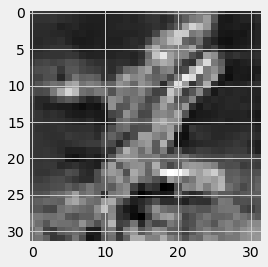

In [102]:
# Afisez o imagine din datele train, pentru a-mi face o idee asupra datelor de intrare

img_proba = imageio.imread('./data/train/000100.png') 

print(img_proba.shape) # dimensiunea imaginii

plt.imshow(img_proba, cmap='gray')
plt.show()

In [103]:
# Realizez o functie prin care incarc mai usor imaginile din datele de intrare

def load_img_from_folder(fold):
    images = []
    for filename in os.listdir(fold):
        img = cv2.imread(os.path.join(fold,filename))
        if img is not None:
            images.append(img)
    return images

In [104]:
# incarc imaginile din datele Train

folder_train = "data/train/"
images_train = load_img_from_folder(folder_train)

# verific sa am tipul dorit de date - list
print('images_train type:', type(images_train))

print()

# convertesc imaginile intr-un numpy array
x_train = asarray(images_train)

# verific sa am tipul dorit de date numpy array
print('x_train type:', type(x_train))

# verific dimensiunile
print('x_train shape:', x_train.shape)

gc.collect()

images_train type: <class 'list'>

x_train type: <class 'numpy.ndarray'>
x_train shape: (30001, 32, 32, 3)


2569

In [105]:
# incarc imaginile din datele Validation

folder_validation = "data/validation/"
images_validation = load_img_from_folder(folder_validation)

# verific sa am tipul dorit de date - list
print('images_validation type:', type(images_validation))

print()

# convertesc imaginile intr-un numpy array
x_validation = asarray(images_validation)

# verific sa am tipul dorit de date numpy array
print('x_validation type:', type(x_validation))

# verific dimensiunile
print('x_validation shape:', x_validation.shape)

gc.collect()

images_validation type: <class 'list'>

x_validation type: <class 'numpy.ndarray'>
x_validation shape: (5000, 32, 32, 3)


20

In [106]:
# incarc imaginile din datele Test

folder_test = "data/test/"
images_test = load_img_from_folder(folder_test)

# verific sa am tipul dorit de date - list
print('images_test type:', type(images_test))

print()

# convertesc imaginile intr-un numpy array
x_test = asarray(images_test)

# verific sa am tipul dorit de date numpy array
print('x_test type:', type(x_test))

# verific dimensiunile
print('x_test shape:', x_test.shape)

gc.collect()

images_test type: <class 'list'>

x_test type: <class 'numpy.ndarray'>
x_test shape: (5000, 32, 32, 3)


20

In [107]:
# Verific daca am realizat citirea bine pentru toate datele de intrare

print(type(x_train))
print(type(y_train))

print(type(x_validation))
print(type(y_validation))

print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [108]:
# Imi afisez dimensiunile tuturor datelor de intrare

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print()
print('x_validation shape:', x_validation.shape)
print('y_validation shape:', y_validation.shape)
print()
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


x_train shape: (30001, 32, 32, 3)
y_train shape: (30001, 1)

x_validation shape: (5000, 32, 32, 3)
y_validation shape: (5000, 1)

x_test shape: (5000, 32, 32, 3)
y_test shape: (5000, 1)


In [109]:
gc.collect()

60

In [22]:
# vizualizez prima imagine din datele Train
# dar de data aceasta sub forma sa de numpy array

index = 0
print( x_train[index] )

[[[146 146 146]
  [147 147 147]
  [144 144 144]
  ...
  [131 131 131]
  [130 130 130]
  [130 130 130]]

 [[140 140 140]
  [142 142 142]
  [141 141 141]
  ...
  [140 140 140]
  [139 139 139]
  [139 139 139]]

 [[139 139 139]
  [139 139 139]
  [141 141 141]
  ...
  [134 134 134]
  [134 134 134]
  [132 132 132]]

 ...

 [[ 30  30  30]
  [ 32  32  32]
  [ 31  31  31]
  ...
  [ 36  36  36]
  [ 39  39  39]
  [ 27  27  27]]

 [[ 31  31  31]
  [ 36  36  36]
  [ 35  35  35]
  ...
  [ 33  33  33]
  [ 31  31  31]
  [ 32  32  32]]

 [[ 36  36  36]
  [ 35  35  35]
  [ 36  36  36]
  ...
  [ 29  29  29]
  [ 32  32  32]
  [ 29  29  29]]]


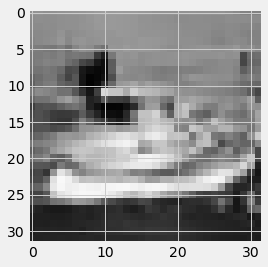

In [110]:
# astfel o pot vizualiza datorita formei de numpy array

index = 0
img = plt.imshow( x_train[index] )

In [82]:
# Afisez eticheta careia ii corespunde
print('The image label is:', y_train[index])

The image label is: [6]


In [111]:
# Afisez clasa careia ii corespunde

classification = [ '0', '1', '2', '3', '4', '5', '6', '7', '8']

print('The image class is:', classification[y_train[index][0]])

The image class is: 6


In [112]:
# urmatorul pas este sa convertesc etichetele imaginilor intr-un set de de 9 numere binare
# deoarece le voi da ca input retelei neuronale (NN)

y_train_new = to_categorical(y_train)
y_validation_new = to_categorical(y_validation)
y_test_new = to_categorical(y_test)

In [113]:
print(y_train_new.shape)
print(y_train_new)
print()
print(y_validation_new.shape)
print(y_validation_new)
print()
print(y_test_new.shape)
print(y_test_new)

gc.collect()

(30001, 9)
[[0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]

(5000, 9)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

(5000, 1)
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


2586

In [114]:
# pentru a ma verifica daca am lucrat corect, 
# afisez noua eticheta a primei imagini

print ('The new label is:', y_train_new[index])

The new label is: [0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [115]:
# Acum trebuie sa normalizez pixelii pentru a avea valori doar intre 0 si 1 

x_train = x_train / 255
x_validation = x_validation / 255
x_test = x_test / 255

In [116]:
# verific pentru prima imagine din fiecare set de date
# pentru a ma asigura ca am valori doar intre 0 si 1
print( x_train[index] )
print( x_validation[index] )
print( x_test[index] )

[[[0.57254902 0.57254902 0.57254902]
  [0.57647059 0.57647059 0.57647059]
  [0.56470588 0.56470588 0.56470588]
  ...
  [0.51372549 0.51372549 0.51372549]
  [0.50980392 0.50980392 0.50980392]
  [0.50980392 0.50980392 0.50980392]]

 [[0.54901961 0.54901961 0.54901961]
  [0.55686275 0.55686275 0.55686275]
  [0.55294118 0.55294118 0.55294118]
  ...
  [0.54901961 0.54901961 0.54901961]
  [0.54509804 0.54509804 0.54509804]
  [0.54509804 0.54509804 0.54509804]]

 [[0.54509804 0.54509804 0.54509804]
  [0.54509804 0.54509804 0.54509804]
  [0.55294118 0.55294118 0.55294118]
  ...
  [0.5254902  0.5254902  0.5254902 ]
  [0.5254902  0.5254902  0.5254902 ]
  [0.51764706 0.51764706 0.51764706]]

 ...

 [[0.11764706 0.11764706 0.11764706]
  [0.1254902  0.1254902  0.1254902 ]
  [0.12156863 0.12156863 0.12156863]
  ...
  [0.14117647 0.14117647 0.14117647]
  [0.15294118 0.15294118 0.15294118]
  [0.10588235 0.10588235 0.10588235]]

 [[0.12156863 0.12156863 0.12156863]
  [0.14117647 0.14117647 0.14117647]


In [117]:
gc.collect()

80

In [44]:
# Realizez arhitectura modelului

model = Sequential()

# Adaug primul layer
model.add( Conv2D( 32, (5,5), activation = 'relu', input_shape = (32, 32, 3) ))

# Adaug un pooling layer
model.add( MaxPooling2D( pool_size = (2,2) ))

# Adaug al 2-lea Convolution layer
model.add( Conv2D( 32, (5,5), activation = 'relu'))

# Adaug al 2-lea pooling layer
model.add( MaxPooling2D( pool_size = (2,2) ))

# Adaug un flattening layer
model.add( Flatten() )

# Adaug un layer cu 1000 neuroni
model.add( Dense(1000, activation = 'relu') )

# Adaug un drop layer
model.add( Dropout(0.5) )

# Adaug un layer cu 500 neuroni
model.add( Dense(500, activation = 'relu') )

# Adaug un drop layer
model.add( Dropout(0.5) )

# Adaug un layer cu 250 neuroni
model.add( Dense(250, activation = 'relu') )

# Adaug un layer cu 9 neuroni deoarce stim ca avem 9 clasa diferite
model.add( Dense(9, activation = 'softmax') )


In [45]:
# Vizualizez arhitectura modelului
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 1000)              801000    
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0

In [215]:
# Compilez modelul, cu un optimizator des folosit

model.compile(optimizer ="adam", 
              loss ="categorical_crossentropy",
              metrics =['accuracy'])

In [29]:
# Compilez modelul, cu alt optimizator

model.compile(optimizer ="rmsprop", 
              loss ="categorical_crossentropy",
              metrics =['accuracy'])

In [111]:
# Compilez modelul adaugand o rata de invatare (learning_rate)

model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [63]:
# Antrenez modelul

hist = model.fit( 
    x_train,
    y_train_new,
    batch_size = 512,
    epochs = 30,
    validation_data = (x_validation, y_validation_new) )


Epoch 1/30
59/59 [==============================] - 26s 419ms/step - loss: 0.2469 - accuracy: 0.9514 - val_loss: 0.5535 - val_accuracy: 0.8712
Epoch 2/30
59/59 [==============================] - 24s 409ms/step - loss: 0.0688 - accuracy: 0.9785 - val_loss: 0.5298 - val_accuracy: 0.8862
Epoch 3/30
59/59 [==============================] - 24s 414ms/step - loss: 0.0543 - accuracy: 0.9820 - val_loss: 0.5333 - val_accuracy: 0.8840
Epoch 4/30
59/59 [==============================] - 24s 415ms/step - loss: 0.0543 - accuracy: 0.9839 - val_loss: 0.5116 - val_accuracy: 0.8828
Epoch 5/30
59/59 [==============================] - 23s 395ms/step - loss: 0.0484 - accuracy: 0.9846 - val_loss: 0.5177 - val_accuracy: 0.8864
Epoch 6/30
59/59 [==============================] - 25s 429ms/step - loss: 0.0603 - accuracy: 0.9814 - val_loss: 0.5853 - val_accuracy: 0.8810
Epoch 7/30
59/59 [==============================] - 24s 411ms/step - loss: 0.0503 - accuracy: 0.9847 - val_loss: 0.5134 - val_accuracy: 0.8846

In [100]:
# Evaluez modelul pe datele de validare

model.evaluate( x_validation, y_validation_new)[1]

157/157 [==============================] - 1s 6ms/step - loss: 0.6489 - accuracy: 0.8866


0.8866000175476074

In [77]:
# Evaluez modelul pe datele train

model.evaluate( x_train, y_train_new)[1]

938/938 [==============================] - 11s 12ms/step - loss: 0.0018 - accuracy: 0.9995


0.999500036239624

In [34]:
gc.collect()

20

In [59]:
# Compilez modelul adaugand o rata de invatare (learning_rate)

model.compile(
#     optimizer="rmsprop",
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [342]:
# Antrenez modelul adaugand earlystopping, 
# deoarece daca nu se imbunatatesc rezultatele, nu are sens sa mai continui rularea epocilor

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
hist = model.fit( x_train, 
                 y_train_new, 
                 batch_size = 512, 
                 epochs = 30, 
                 validation_data = (x_validation, y_validation_new),
                 callbacks =[earlystopping] )

Epoch 1/30
59/59 [==============================] - 16s 254ms/step - loss: 0.1645 - accuracy: 0.9653 - val_loss: 0.9002 - val_accuracy: 0.8710
Epoch 2/30
59/59 [==============================] - 15s 253ms/step - loss: 0.0458 - accuracy: 0.9888 - val_loss: 0.7849 - val_accuracy: 0.8900
Epoch 3/30
59/59 [==============================] - 15s 249ms/step - loss: 0.0442 - accuracy: 0.9883 - val_loss: 0.9412 - val_accuracy: 0.8654
Epoch 4/30
59/59 [==============================] - 15s 250ms/step - loss: 0.0483 - accuracy: 0.9879 - val_loss: 0.7084 - val_accuracy: 0.8798
Epoch 5/30
59/59 [==============================] - 15s 249ms/step - loss: 0.0430 - accuracy: 0.9880 - val_loss: 0.8509 - val_accuracy: 0.8840
Epoch 6/30
59/59 [==============================] - 15s 251ms/step - loss: 0.0444 - accuracy: 0.9894 - val_loss: 0.8440 - val_accuracy: 0.8696
Epoch 7/30
59/59 [==============================] - 15s 251ms/step - loss: 0.0507 - accuracy: 0.9867 - val_loss: 0.7001 - val_accuracy: 0.8878

In [344]:
# Evaluez modelul pe datele de validare

model.evaluate( x_validation, y_validation_new)[1]

157/157 [==============================] - 1s 6ms/step - loss: 0.7001 - accuracy: 0.8878


0.8877999782562256

In [343]:
# Evaluez modelul pe datele train

model.evaluate( x_train, y_train_new)[1]

938/938 [==============================] - 5s 6ms/step - loss: 0.0021 - accuracy: 0.9999


0.9998999834060669

In [ ]:
gc.collect()

In [60]:
# Am incercat sa modific putin arhitectura modelului, dar nu s-au imbunatatit rezultatele

model = Sequential()

# Adaug primul layer
model.add( Conv2D( 32, (5,5), activation = 'relu', input_shape = (32, 32, 3) ))

# Adaug un pooling layer
model.add( MaxPooling2D( pool_size = (2,2) ))

# Adaug al 2-lea Convolution layer
model.add( Conv2D( 32, (5,5), activation = 'relu'))

# Adaug al 2-lea pooling layer
model.add( MaxPooling2D( pool_size = (2,2) ))

# Am incercat sa adaug un al 3-lea Convolution layer
# model.add( Conv2D( 32, (5,5), activation = 'relu'))

# Adaug un flattening layer
model.add( Flatten() )

# Adaug un layer cu 1000 neuroni
model.add( Dense(1000, activation = 'relu') )

# Adaug un drop layer
model.add( Dropout(0.5) )

# Adaug un layer cu 500 neuroni
model.add( Dense(500, activation = 'relu') )

# Adaug un drop layer
model.add( Dropout(0.5) )

# Adaug un layer cu 250 neuroni
model.add( Dense(250, activation = 'relu') )

# Adaug un layer cu 9 neuroni deoarce stim ca avem 9 clasa diferite
model.add( Dense(9, activation = 'softmax') )


In [118]:
gc.collect()

20

In [62]:
# Compilez modelul

model.compile(
    optimizer = keras.optimizers.RMSprop(learning_rate = 1e-3),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"],
)

In [136]:
# Compilez modelul, dar scimb optimizatorul, si pastrand rata de invatare (learning_rate = 1e-3)

model.compile( 
              optimizer = keras.optimizers.Adam(learning_rate = 1e-3), 
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])

In [63]:
# Antrenez modelul adaugand earlystopping
# si modific dimensiunea batch si numarul de epoci

earlystopping = callbacks.EarlyStopping( 
                                        monitor ="val_loss", 
                                        mode ="min", patience = 2,
                                        restore_best_weights = True)                                        
  
hist = model.fit( x_train, 
                  y_train_new, 
                  batch_size = 1024, 
                  epochs = 50, 
                  validation_data = (x_validation, y_validation_new),
                  callbacks =[earlystopping] )

Epoch 1/50
30/30 [==============================] - 17s 520ms/step - loss: 2.1569 - accuracy: 0.1935 - val_loss: 1.5616 - val_accuracy: 0.4828
Epoch 2/50
30/30 [==============================] - 15s 501ms/step - loss: 1.6825 - accuracy: 0.4353 - val_loss: 1.4065 - val_accuracy: 0.5564
Epoch 3/50
30/30 [==============================] - 14s 484ms/step - loss: 1.3359 - accuracy: 0.5520 - val_loss: 0.9733 - val_accuracy: 0.6714
Epoch 4/50
30/30 [==============================] - 15s 487ms/step - loss: 1.0831 - accuracy: 0.6330 - val_loss: 0.8095 - val_accuracy: 0.7284
Epoch 5/50
30/30 [==============================] - 15s 492ms/step - loss: 0.9519 - accuracy: 0.6779 - val_loss: 0.8241 - val_accuracy: 0.7156
Epoch 6/50
30/30 [==============================] - 15s 494ms/step - loss: 0.8523 - accuracy: 0.7115 - val_loss: 0.8246 - val_accuracy: 0.7178


In [ ]:
# Test pentru clasificatorul KNN

In [64]:
# Evaluez modelul pe datele de validare

model.evaluate( x_validation, y_validation_new)[1]

157/157 [==============================] - 1s 5ms/step - loss: 0.8095 - accuracy: 0.7284


0.7283999919891357

In [65]:
# Evaluez modelul pe datele train

model.evaluate( x_train, y_train_new)[1]

938/938 [==============================] - 5s 6ms/step - loss: 0.7850 - accuracy: 0.7372


0.7372421026229858

In [129]:
gc.collect()

20

In [ ]:
# Efectuez diferite teste pe modelul curent CNN

In [142]:
# Evaluez modelul pe datele de validare cu optimizatorul Adam

model.evaluate( x_validation, y_validation_new)[1]

157/157 [==============================] - 1s 6ms/step - loss: 0.4641 - accuracy: 0.8788


0.8787999749183655

In [143]:
# Evaluez modelul pe datele train

model.evaluate( x_train, y_train_new)[1]

938/938 [==============================] - 5s 6ms/step - loss: 0.0179 - accuracy: 0.9958


0.9958001375198364

In [129]:
gc.collect()

20

In [195]:
# Evaluez modelul pe datele de validare cu optimizatorul RMSprop si aplicat (learning_rate = 1e-3)

model.evaluate( x_validation, y_validation_new)[1]

157/157 [==============================] - 2s 12ms/step - loss: 0.6376 - accuracy: 0.8936


0.8935999870300293

In [196]:
# Evaluez modelul pe datele train

model.evaluate( x_train, y_train_new)[1]

938/938 [==============================] - 11s 12ms/step - loss: 3.6842e-04 - accuracy: 1.00001s - loss: 3.7323e-04 - ac - ETA: 0s - loss: 3.705


0.9999666810035706

In [197]:
gc.collect()

4458

In [180]:
# Evaluez modelul pe datele de validare cu optimizatorul RMSprop

model.evaluate( x_validation, y_validation_new)[1]

157/157 [==============================] - 2s 12ms/step - loss: 0.6095 - accuracy: 0.8932


0.8931999802589417

In [181]:
# Evaluez modelul pe datele train

model.evaluate( x_train, y_train_new)[1]

938/938 [==============================] - 11s 12ms/step - loss: 8.7653e-04 - accuracy: 1.00000s - loss: 8.8422e-04 - accu


1.0

In [178]:
gc.collect()

20

In [135]:
# Evaluez modelul pe datele de validare

model.evaluate( x_validation, y_validation_new)[1]

157/157 [==============================] - 1s 5ms/step - loss: 0.5492 - accuracy: 0.8922


0.8921999931335449

In [136]:
# Evaluez modelul pe datele train

model.evaluate( x_train, y_train_new)[1]

938/938 [==============================] - 5s 5ms/step - loss: 3.4944e-04 - accuracy: 1.0000


1.0

In [146]:
gc.collect()

20

In [115]:
# Evaluez modelul pe datele de validare

model.evaluate( x_validation, y_validation_new)[1]

157/157 [==============================] - 1s 5ms/step - loss: 0.5716 - accuracy: 0.8940


0.8939999938011169

In [116]:
# Evaluez modelul pe datele train

model.evaluate( x_train, y_train_new)[1]

938/938 [==============================] - 5s 6ms/step - loss: 2.3445e-04 - accuracy: 1.0000


1.0

In [101]:
gc.collect()

20

In [97]:
# Evaluez modelul pe datele de validare

model.evaluate( x_validation, y_validation_new)[1]

157/157 [==============================] - 1s 6ms/step - loss: 0.5033 - accuracy: 0.8908


0.8907999992370605

In [98]:
# Evaluez modelul pe datele train

model.evaluate( x_train, y_train_new)[1]

938/938 [==============================] - 5s 5ms/step - loss: 0.0010 - accuracy: 0.9999


0.9999333620071411

In [101]:
gc.collect()

20

In [198]:
# Test pentru clasificatorul KNN
# Pentru acuratetea de 0.7284 am obtinut:

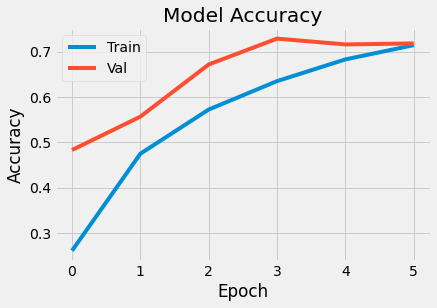

In [66]:
# Observam pe diagrama acuratetea modelului

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

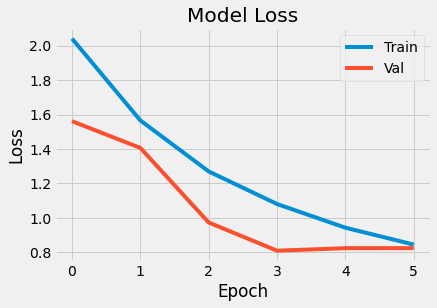

In [67]:
# Observam pe diagrama pierderile modelului

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [198]:
# Pentru acuratetea de 0.8935 am obtinut:

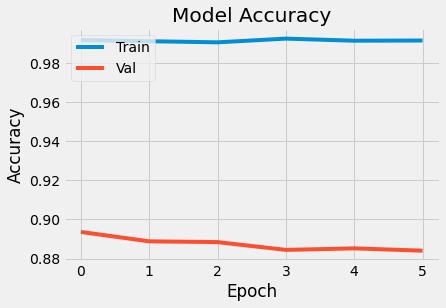

In [199]:
# Observam pe diagrama acuratetea modelului

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

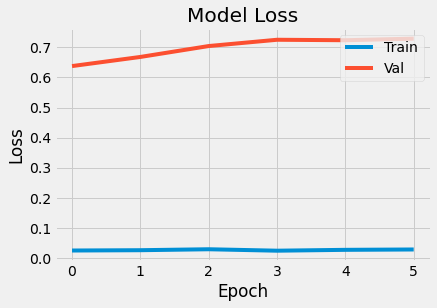

In [201]:
# Observam pe diagrama pierderile modelului

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [ ]:
# Pentru acuratetea 0.8931 am obtinut:

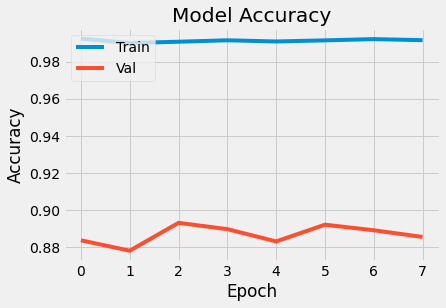

In [182]:
# Observam pe diagrama acuratetea modelului

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

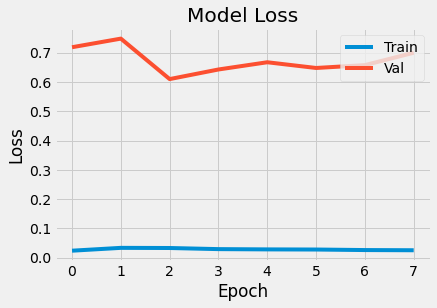

In [183]:
# Observam pe diagrama pierderile modelului

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [119]:
# Rezultaltat pentru clasificatorul KNN

In [123]:
# Pentru acuratetea de 0.7284 am obtinut:

# Formez matricea de confuzie

my_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8]

# generez predictiile pentru datele de validare
predicted_prob = model.predict(x_validation)

# generez predictiile pentru clasele mele
predictions = np.argmax(predicted_prob, axis=1)

labels_flat = np.argmax(y_validation_new, axis=1)

mat =  tf.math.confusion_matrix(labels_flat, predictions).numpy()
print(mat)

[[391  12  11  12  57   3  43  11  30]
 [ 20 401  50  14  13   3   8  14   4]
 [  9  17 424  15  32  16  14   6   0]
 [ 13   7  24 422  29  21  26  10  26]
 [ 50  12  57  27 368  13   8  11   8]
 [ 16   2  48  38  24 376  29  22   6]
 [ 11  11  14  13   4   3 511   3  10]
 [ 51  22  25  38  25  11  33 313   2]
 [ 41   3   1  20   3   8  62   3 436]]


In [125]:
# normalizez valorile
mat_norm = np.around(mat.astype('float') / mat.sum(axis=1)[:, np.newaxis], decimals=3)

print(mat_norm)

[[0.686 0.021 0.019 0.021 0.1   0.005 0.075 0.019 0.053]
 [0.038 0.761 0.095 0.027 0.025 0.006 0.015 0.027 0.008]
 [0.017 0.032 0.795 0.028 0.06  0.03  0.026 0.011 0.   ]
 [0.022 0.012 0.042 0.73  0.05  0.036 0.045 0.017 0.045]
 [0.09  0.022 0.103 0.049 0.664 0.023 0.014 0.02  0.014]
 [0.029 0.004 0.086 0.068 0.043 0.67  0.052 0.039 0.011]
 [0.019 0.019 0.024 0.022 0.007 0.005 0.881 0.005 0.017]
 [0.098 0.042 0.048 0.073 0.048 0.021 0.063 0.602 0.004]
 [0.071 0.005 0.002 0.035 0.005 0.014 0.107 0.005 0.756]]


In [127]:
# incadrez intr-un tabel
mat_norm2 = pd.DataFrame(mat_norm,
                     index = my_classes, 
                     columns = my_classes)
mat_norm2

,0,1,2,3,4,5,6,7,8
0,0.686,0.021,0.019,0.021,0.100,0.005,0.075,0.019,0.053
1,0.038,0.761,0.095,0.027,0.025,0.006,0.015,0.027,0.008
2,0.017,0.032,0.795,0.028,0.060,0.030,0.026,0.011,0.000
3,0.022,0.012,0.042,0.730,0.050,0.036,0.045,0.017,0.045
4,0.090,0.022,0.103,0.049,0.664,0.023,0.014,0.020,0.014
5,0.029,0.004,0.086,0.068,0.043,0.670,0.052,0.039,0.011
6,0.019,0.019,0.024,0.022,0.007,0.005,0.881,0.005,0.017
7,0.098,0.042,0.048,0.073,0.048,0.021,0.063,0.602,0.004
8,0.071,0.005,0.002,0.035,0.005,0.014,0.107,0.005,0.756


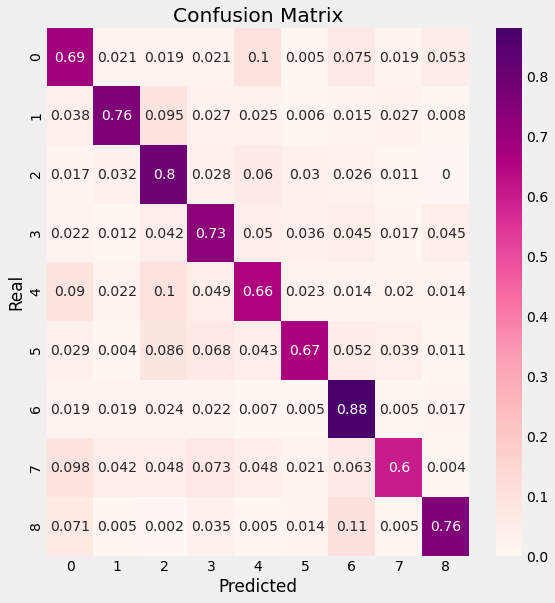

In [128]:
# Stilizez rezultatul
figure = plt.figure(figsize=(8, 8))
sns.heatmap(mat_norm2, annot = True, cmap = plt.cm.RdPu)

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Real')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# obtin matricea de confuzie pentru CNN ales de mine

In [109]:
# Pentru acuratetea de 0.8935
# Formez matricea de confuzie

my_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8]

# generez predictiile pentru datele de validare
predicted_prob = model.predict(x_validation)

# generez predictiile pentru clasele mele
predictions = np.argmax(predicted_prob, axis=1)

labels_flat = np.argmax(y_validation_new, axis=1)

mat =  tf.math.confusion_matrix(labels_flat, predictions).numpy()
print(mat)

[[473   6   7   6  21   2  22  14  19]
 [ 15 479   5   4   2   1   3  14   4]
 [ 11   7 450  20  17  11   4  13   0]
 [  8   4   5 518  10   4   3  17   9]
 [ 34   6  20  20 447  10   3   8   6]
 [  4   1  17  22   5 483  11  13   5]
 [  5   1   2   5   3   1 552   4   7]
 [ 10   9   9  16   3  14   9 449   1]
 [ 13   1   0  11   1   1  20   3 527]]


In [110]:
# normalizez valorile
mat_norm = np.around(mat.astype('float') / mat.sum(axis=1)[:, np.newaxis], decimals=3)

print(mat_norm)

[[0.83  0.011 0.012 0.011 0.037 0.004 0.039 0.025 0.033]
 [0.028 0.909 0.009 0.008 0.004 0.002 0.006 0.027 0.008]
 [0.021 0.013 0.844 0.038 0.032 0.021 0.008 0.024 0.   ]
 [0.014 0.007 0.009 0.896 0.017 0.007 0.005 0.029 0.016]
 [0.061 0.011 0.036 0.036 0.807 0.018 0.005 0.014 0.011]
 [0.007 0.002 0.03  0.039 0.009 0.861 0.02  0.023 0.009]
 [0.009 0.002 0.003 0.009 0.005 0.002 0.952 0.007 0.012]
 [0.019 0.017 0.017 0.031 0.006 0.027 0.017 0.863 0.002]
 [0.023 0.002 0.    0.019 0.002 0.002 0.035 0.005 0.913]]


In [111]:
# incadrez intr-un tabel
mat_norm2 = pd.DataFrame(mat_norm,
                     index = my_classes, 
                     columns = my_classes)
mat_norm2

,0,1,2,3,4,5,6,7,8
0,0.830,0.011,0.012,0.011,0.037,0.004,0.039,0.025,0.033
1,0.028,0.909,0.009,0.008,0.004,0.002,0.006,0.027,0.008
2,0.021,0.013,0.844,0.038,0.032,0.021,0.008,0.024,0.000
3,0.014,0.007,0.009,0.896,0.017,0.007,0.005,0.029,0.016
4,0.061,0.011,0.036,0.036,0.807,0.018,0.005,0.014,0.011
5,0.007,0.002,0.030,0.039,0.009,0.861,0.020,0.023,0.009
6,0.009,0.002,0.003,0.009,0.005,0.002,0.952,0.007,0.012
7,0.019,0.017,0.017,0.031,0.006,0.027,0.017,0.863,0.002
8,0.023,0.002,0.000,0.019,0.002,0.002,0.035,0.005,0.913


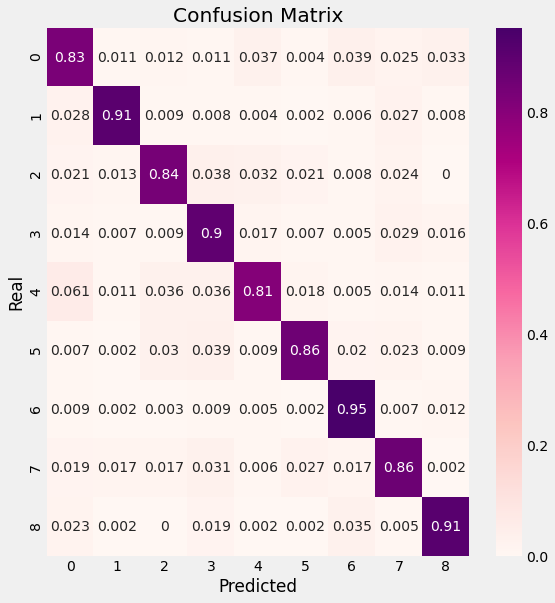

In [121]:
# Stilizez rezultatul
figure = plt.figure(figsize=(8, 8))
sns.heatmap(mat_norm2, annot = True, cmap = plt.cm.RdPu)

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Real')
plt.xlabel('Predicted')
plt.show()

In [134]:
# Rezultaltat pentru clasificatorul KNN - acuratetea de 0.7284

In [135]:
# formez predictiile modelului pe datele de test
predictions = model.predict(x_test)

# afisez predictiile
predictions

array([[1.2559725e-01, 1.2293058e-02, 7.4327335e-02, ..., 1.8876433e-01,
        6.4600468e-02, 2.6200248e-02],
       [8.3792418e-01, 2.2487314e-03, 1.5365309e-02, ..., 1.7961403e-03,
        2.3967728e-03, 7.7343108e-03],
       [2.1835516e-01, 1.3695090e-01, 1.1637857e-01, ..., 2.2664474e-01,
        1.0158751e-01, 6.1933514e-02],
       ...,
       [4.7954708e-02, 1.6519645e-01, 1.6908836e-01, ..., 1.2053973e-02,
        4.6903709e-01, 8.7018106e-03],
       [3.6679333e-01, 5.1510339e-03, 1.8540716e-02, ..., 3.1707349e-01,
        2.6189440e-01, 9.4480840e-03],
       [1.0638120e-01, 3.5140925e-04, 7.9620235e-02, ..., 4.8599365e-01,
        5.2174646e-03, 3.8083813e-03]], dtype=float32)

In [131]:
# Pentru acuratetea de 0.7284 am obtinut:
# pentru a le vizualiza mai bine, le sortez crescator

list_index = [0,1,2,3,4,5,6,7,8]
x = predictions

for i in range(9):
    for j in range(9):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
            
# afisez lista cu etichete sortata crescator
print(list_index)

[5, 6, 4, 0, 3, 2, 7, 8, 1]


In [132]:
# Pentru acuratetea de 0.7284 am obtinut:
# afisez primele 5 predictii

for i in range(5):
    print( classification[ list_index[i] ], ':', 
           round(predictions[0][ list_index[i] ] * 100,3) , '%')

5 : 24.151 %
6 : 18.876 %
4 : 17.16 %
0 : 12.56 %
3 : 9.511 %


In [ ]:
# Rezultaltat pentru clasificatorul CNN -acuratetea de 0.8935

In [202]:
# afisez o scurta prezentare a rezultatelor obtinute anterior

hist.history

{'loss': [0.025029340758919716,
  0.026072580367326736,
  0.029233472421765327,
  0.024436503648757935,
  0.027286700904369354,
  0.02848605439066887],
 'accuracy': [0.9919002652168274,
  0.9913336038589478,
  0.9907670021057129,
  0.9926669001579285,
  0.9916002750396729,
  0.991700291633606],
 'val_loss': [0.6376479864120483,
  0.6679909229278564,
  0.7042123079299927,
  0.7250640392303467,
  0.7235111594200134,
  0.7288457155227661],
 'val_accuracy': [0.8935999870300293,
  0.8888000249862671,
  0.8884000182151794,
  0.8844000101089478,
  0.885200023651123,
  0.8840000033378601]}

In [ ]:
# Rezultaltat pentru clasificatorul CNN -acuratetea de 0.8935

In [203]:
# formez predictiile modelului pe datele de test
predictions = model.predict(x_test)

# afisez predictiile
predictions

array([[1.3641286e-08, 7.5922552e-10, 2.0352768e-08, ..., 1.3657682e-09,
        9.9198687e-01, 5.4975796e-10],
       [9.1546941e-01, 2.2318100e-06, 7.7435558e-08, ..., 1.3284572e-09,
        9.7669195e-05, 4.3045052e-09],
       [1.7785070e-04, 9.2176092e-01, 7.6331429e-02, ..., 1.3214926e-04,
        3.5097694e-04, 5.4300710e-04],
       ...,
       [2.3527494e-04, 3.9776972e-01, 5.8980179e-01, ..., 8.2556983e-07,
        3.7366344e-04, 1.2865925e-08],
       [2.0870343e-01, 1.0230374e-05, 1.1074110e-08, ..., 6.3577318e-05,
        7.9120171e-01, 1.1612610e-06],
       [3.8745230e-01, 2.4119755e-11, 1.5588868e-06, ..., 8.6665619e-11,
        1.4638464e-08, 1.6328361e-12]], dtype=float32)

In [204]:
# pentru a ma verifica, afisez dimensiunea predictiilor

print("predictions shape:", predictions.shape) 

predictions shape: (5000, 9)


In [205]:
# Pentru acuratetea de 0.8935
# pentru a le vizualiza mai bine, le sortez crescator

list_index = [0,1,2,3,4,5,6,7,8]
x = predictions

for i in range(9):
    for j in range(9):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
            
# afisez lista cu etichete sortata crescator
print(list_index)

[7, 5, 4, 3, 2, 0, 6, 1, 8]


In [207]:
# Pentru acuratetea de 0.8935
# afisez primele 5 predictii

for i in range(5):
    print( classification[ list_index[i] ], ':', 
           round(predictions[0][ list_index[i] ] * 100,3) , '%')

7 : 99.199 %
5 : 0.801 %
4 : 0.0 %
3 : 0.0 %
2 : 0.0 %


In [206]:
# Pentru acuratetea 0.8931
# pentru a le vizualiza mai bine, le sortez crescator

list_index = [0,1,2,3,4,5,6,7,8]
x = predictions

for i in range(9):
    for j in range(9):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
            
# afisez lista cu etichete sortata crescator
print(list_index)

[7, 5, 4, 3, 2, 0, 6, 1, 8]


In [208]:
# Pentru acuratetea 0.8931
# afisez primele 5 predictii

for i in range(5):
    print( classification[ list_index[i] ], ':', 
           round(predictions[0][ list_index[i] ] * 100,3) , '%')

7 : 99.199 %
5 : 0.801 %
4 : 0.0 %
3 : 0.0 %
2 : 0.0 %


In [133]:
# creez o functie de afisare
def form_object(index):
    return "0" + str(35001 + index) + ".png"

# afisez in fisier predictiile obtinute
with open("submission.txt", "w") as fout:
    fout.write("id,label\n")
    for index in range( len(x_test)):
        label = np.argmax(predictions[index])
        fout.write( form_object(index) + "," + str(label) + "\n")
